**Facial Expression Detection**

**Importing the Modules**

In [1]:
!pip install utils
!pip install livelossplot

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from livelossplot.inputs.tf_keras import PlotLossesCallback
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
# from livelossplot import PlotLossesTensorFlowKeras
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.4


**Get and Understanding about the Dataset and Load the Dataset**

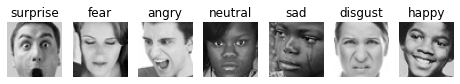

In [3]:
i = 1
plt.figure(figsize=(8,8))
for expression in os.listdir('../input/fer2013/test/'):
    
    img = load_img(('../input/fer2013/test/' + expression +'/'+ os.listdir('../input/fer2013/test/' + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
    
plt.show()

In [4]:
#check the amount of data in each folder in training dataset
for expression in os.listdir('../input/fer2013/train/'):
    print(expression, "folder contains\t\t", len(os.listdir('../input/fer2013/train/'+expression)), "images")

surprise folder contains		 3171 images
fear folder contains		 4097 images
angry folder contains		 3995 images
neutral folder contains		 4965 images
sad folder contains		 4830 images
disgust folder contains		 436 images
happy folder contains		 7215 images


In [5]:
#check the amount of data in each folder in testing dataset
for expression in os.listdir('../input/fer2013/test/'):
    print(expression, "folder contains\t\t", len(os.listdir('../input/fer2013/test/'+expression)), "images")

surprise folder contains		 831 images
fear folder contains		 1024 images
angry folder contains		 958 images
neutral folder contains		 1233 images
sad folder contains		 1247 images
disgust folder contains		 111 images
happy folder contains		 1774 images


**Genarate Preprocessing**

In [6]:
# Data Augmentation

datagen_train = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

train_generator = datagen_train.flow_from_directory('../input/fer2013/train/',
                                                batch_size = 64,
                                                target_size=(48, 48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

datagen_test = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

test_generator = datagen_test.flow_from_directory('../input/fer2013/test/',
                                                batch_size = 64,
                                                target_size=(48, 48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Build the CNN Model**

In [7]:
model = tf.keras.models.Sequential()   

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
    
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
model.summary()

2022-09-19 09:28:30.249201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 09:28:30.376626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 09:28:30.377464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

2022-09-19 09:28:30.379456: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-19 09:28:30.379791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 09:28:30.380601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-19 09:28:30.381314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

**Model Training**

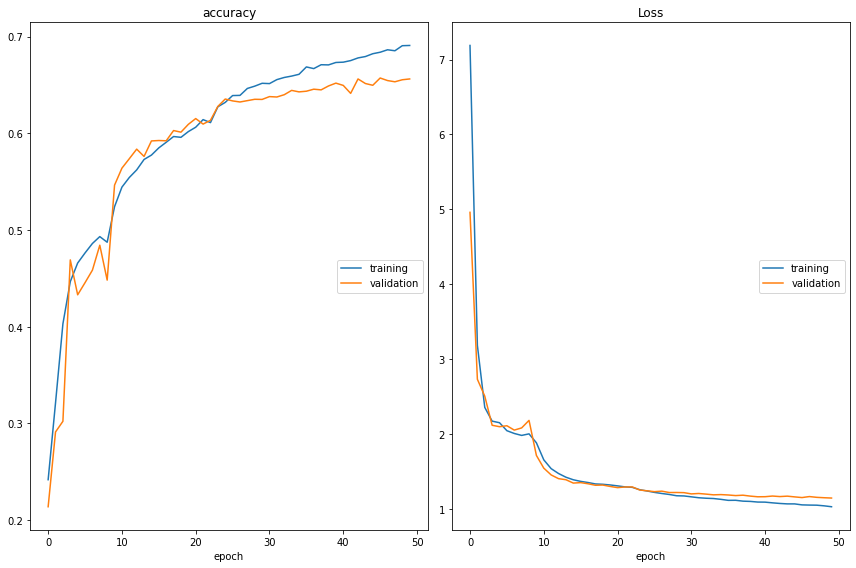

accuracy
	training         	 (min:    0.242, max:    0.691, cur:    0.691)
	validation       	 (min:    0.214, max:    0.657, cur:    0.656)
Loss
	training         	 (min:    1.035, max:    7.187, cur:    1.035)
	validation       	 (min:    1.151, max:    4.962, cur:    1.151)

Epoch 00050: saving model to model_weights.h5


In [8]:
epochs = 50
steps_per_epoch = train_generator.n/train_generator.batch_size
testing_steps = test_generator.n/test_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience = 2, min_lr=0.00001, model='auto')

callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=testing_steps,
    callbacks=callbacks
)


In [10]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)